In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import os

C = os.getcwd()
print(C)


/Users/alonso


In [74]:
rn_rcp45 = pd.read_csv('Dropbox/PROJECTS/Son/SWAT/Data/RCP45_data/Stations_nobiascorrections/pSongma.csv')
rn_rcp45.shape


(18263, 3)

In [75]:
rn_rcp45.head(3)

,time,pr_kgm2s1,pr_mm
0,2016-01-01,0.0,0.0
1,2016-01-02,0.0,0.0
2,2016-01-03,0.0,0.0


In [76]:
rn_rcp45.dtypes

time          object
pr_kgm2s1    float64
pr_mm        float64
dtype: object

In [77]:
rn_rcp45['time'] =  pd.to_datetime(rn_rcp45['time'])

In [78]:
rn_rcp45.dtypes

time         datetime64[ns]
pr_kgm2s1           float64
pr_mm               float64
dtype: object

In [79]:
rn_rcp45 = rn_rcp45.set_index('time')
rn_rcp45.head(3)

,pr_kgm2s1,pr_mm
time,,
2016-01-01,0.0,0.0
2016-01-02,0.0,0.0
2016-01-03,0.0,0.0


In [80]:
rn_rcp45['Year'] = rn_rcp45.index.year
rn_rcp45['Month'] = rn_rcp45.index.month
rn_rcp45['Weekday Name'] = rn_rcp45.index.weekday_name
# Display a random sampling of 5 rows
rn_rcp45.sample(5, random_state=0)

,pr_kgm2s1,pr_mm,Year,Month,Weekday Name
time,,,,,
2025-11-08,0.000000,0.0,2025,11,Saturday
2054-10-25,0.000000,0.0,2054,10,Sunday
2030-07-02,0.000235,20.3,2030,7,Tuesday
2027-03-12,0.000000,0.0,2027,3,Friday
2043-06-22,0.000000,0.0,2043,6,Monday


In [81]:
sns.set(rc={'figure.figsize':(11, 4)})

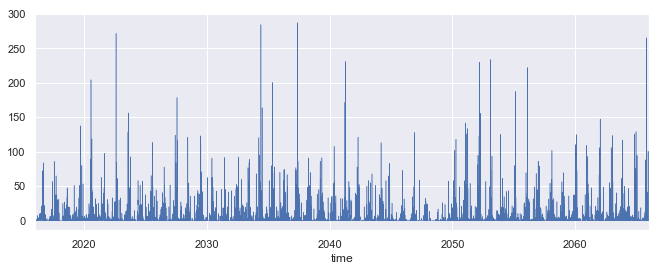

In [82]:
rn_rcp45['pr_mm'].plot(linewidth=0.5);

In [110]:
# Downscale from daily to monthly (take the sum)
rn_rcp45_M =pd.DataFrame()
rn_rcp45_M['pr_mmM'] = rn_rcp45['pr_mm'].resample('M').sum()
rn_rcp45_M.head(10)

#print(rn_rcp45_M.shape[0])


,pr_mmM
time,
2016-01-31,15.3
2016-02-29,3.5
2016-03-31,16.0
2016-04-30,18.8
2016-05-31,17.7
2016-06-30,38.3
2016-07-31,59.7
2016-08-31,187.9
2016-09-30,259.5


In [111]:
rn_rcp45_M['Year'] = rn_rcp45_M.index.year
rn_rcp45_M['Month'] = rn_rcp45_M.index.month
# Display a random sampling of 5 rows
rn_rcp45_M.sample(5, random_state=0)

,pr_mmM,Year,Month
time,,,
2052-03-31,544.4,2052,3
2026-03-31,28.6,2026,3
2034-09-30,10.5,2034,9
2055-12-31,254.8,2055,12
2033-02-28,35.4,2033,2


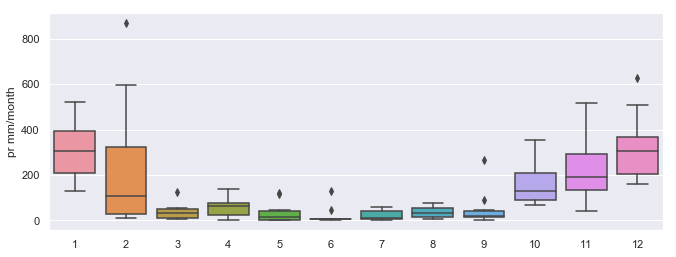

In [112]:
fig, ax = plt.subplots()
sns.boxplot(data=rn_rcp45_M.tail(120), x='Month', y='pr_mmM', ax=ax)
ax.set_ylabel('pr mm/month')
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [100]:
rn_rcp45_M.to_csv('Dropbox/PROJECTS/Son/SWAT/Data/RCP45_data/Stations_nobiascorrections/pSongma_M.csv')